# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [3]:
# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Show the first ten rows of the city_data_df
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


### Merge the DataFrames

In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
# Used code from wanghen21, “Pyber_challenge.ipynb.” This simplified the code. Previously creating unnessary dataframes. 
total_rides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
print(total_rides_count)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [7]:
# 2. Get the total drivers for each city type.
# Total driver count using Excel, urban: 2,405; suburban: 490; rural: 78
total_drivers_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
print(total_drivers_count)


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


In [8]:
#  3. Get the total amount of fares for each city type
total_fare_sum = pyber_data_df.groupby(["type"]).sum()["fare"]
print(total_fare_sum)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [9]:
#  4 Get the average fare per ride for each city type. 
avg_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
print(avg_per_ride)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64


In [10]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / total_drivers_count
print(avg_fare_per_driver)

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64


In [11]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Type": type,
    "Total Rides": total_rides_count,
    "Total Drivers": total_drivers_count,
    "Total Fares": total_fare_sum,
    "Average Fare per Ride": avg_per_ride,
    "Average Fare per Driver": avg_fare_per_driver})

# View the dataframe.
pyber_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,,
Rural,<class 'type'>,125,537,4327.93,34.623440,8.059460
Suburban,<class 'type'>,625,8570,19356.33,30.970128,2.258615
Urban,<class 'type'>,1625,59602,39854.38,24.525772,0.668675


In [12]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [13]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Type,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,<class 'type'>,125,537,"$4,327.93",$34.62,$8.06
Suburban,<class 'type'>,625,"8,570","$19,356.33",$30.97,$2.26
Urban,<class 'type'>,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
#  Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [23]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [24]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_pivot = df.reset_index()

In [25]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pd.pivot_table(pyber_pivot, values='fare', index = 'date', columns ='type')

pyber_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [28]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# Used code from wanghen21, “Pyber_challenge.ipynb.” This simplified the code. Previously using standard dataframe creation
# and not incorporating pivot table and loc function
challenge_pivot = pyber_pivot.loc["1/1/2019":"4/29/2019"] 
challenge_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [29]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 7.
# pyber_df.index = pd.to_datetime(df.index)
challenge_pivot.index = pd.to_datetime(challenge_pivot.index)
challenge_pivot.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-05-07 20:05:15', '2019-05-07 20:22:19',
               '2019-05-07 20:40:29', '2019-05-08 01:54:18',
               '2019-05-08 02:31:25', '2019-05-08 04:20:00',
               '2019-05-08 04:39:49', '2019-05-08 07:29:01',
               '2019-05-08 11:38:35', '2019-05-08 13:10:18'],
              dtype='datetime64[ns]', name='date', length=2375, freq=None)

In [30]:
# 6. Check that the datatype for the index is datetime using df.info()
challenge_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [32]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = challenge_pivot.resample('W').sum()
df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


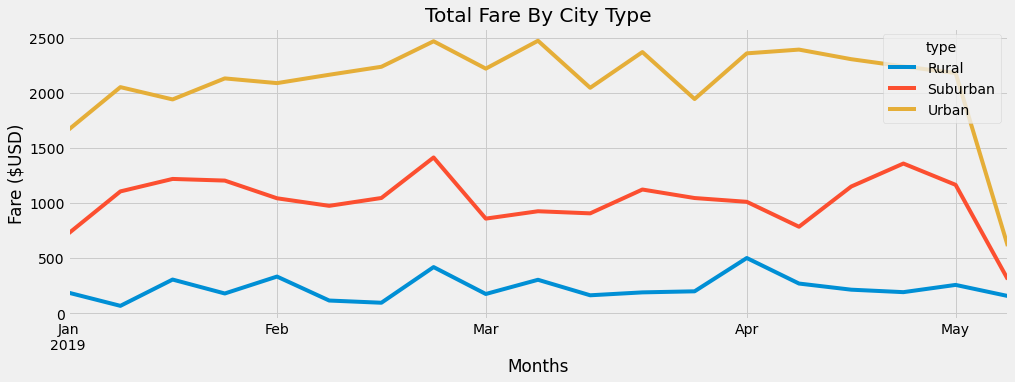

In [33]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
df.plot(figsize = (15,5))
plt.title("Total Fare By City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Months")

plt.savefig("Resources/PyBer_fare_summary.png",dpi = 300, bbox_inches='tight')